In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json     # read and write json files
import re       # regular expression for finding numbers in strings
import locale   # convert string to numbers with thousand separators
import pprint

# Data Processing

## Import Data from JSON

In [2]:
def flatten_data_dict(data_dict):
  flattened_data_dict = dict()
  for key in data_dict.keys():
    if data_dict[key] is None:
      continue
    if type(data_dict[key]) == dict:
      for sub_key in data_dict[key].keys():
        flattened_data_dict[f'{key} - {sub_key}'] = data_dict[key][sub_key]
    else:
      flattened_data_dict[key] = data_dict[key]
  return flattened_data_dict



def read_data_from_json(json_input_file_path='data/ssd.json'):
  with open(json_input_file_path, 'r') as f:
    data_dict = json.load(f)

  example_key = "acer-fa100-1-tb.d333"
  example_data_dict_before_flattening = data_dict[example_key]
  # pprint.pprint(example_data_dict_before_flattening)

  # Flatten data_dict
  flattened_data_dict = dict()
  for ssd_id in data_dict.keys():
    ssd_data_dict = data_dict[ssd_id]
    flattened_ssd_data_dict = flatten_data_dict(data_dict=ssd_data_dict)
    flattened_data_dict[ssd_id] = flattened_ssd_data_dict

  # pprint.pprint(flattened_data_dict[example_key])

  dataframe = pd.DataFrame(flattened_data_dict).T
  return dataframe



def test_flatten_data_dict():
  dict_before_flattening = {
    "SSD ID": "acer-fa100-1-tb.d333",
    "SSD Name": "Acer FA100 1 TB (Micron B27B)",
    "Solid-State-Drive": {
      "Capacity": "1 TB (1024 GB)",
      "Production": "Active",
      "Released": "Apr 30th, 2021",
      "Price at Launch": "105 USD",
      "Market": "Consumer"
    },
    "Performance": {
      "Sequential Read": "3,300 MB/s",
      "Sequential Write": "2,700 MB/s",
      "Random Read": "325,000 IOPS",
      "Random Write": "293,000 IOPS",
      "Warranty": "5 Years"
    },
    "Physical": {
      "Power Draw": "1.00 W (Idle) 2.0 W (Avg) 3.7 W (Max)"
    },
    "NAND Flash": {
      "Type": "TLC"
    },
    "DRAM Cache": {
      "Type": "No"
    }
  }

  dict_after_flattening = flatten_data_dict(data_dict=dict_before_flattening)
  pprint.pprint(dict_after_flattening)



def test_read_data_from_json():
  dataframe = read_data_from_json(json_input_file_path='data/ssd.json')
  # # print(dataframe.head())
  # print(dataframe.shape)
  # # print(dataframe.columns)
  # # print(dataframe.info())
  # # print(dataframe.describe())
  # print(dataframe.info())
  # print(dataframe.isna().sum())

  # print(dataframe['Solid-State-Drive - Price at Launch in USD'].describe())
  # print(dataframe['Solid-State-Drive - Price at Launch in USD'])

  return dataframe


test_flatten_data_dict()

test_read_data_from_json().head(2)

{'DRAM Cache - Type': 'No',
 'NAND Flash - Type': 'TLC',
 'Performance - Random Read': '325,000 IOPS',
 'Performance - Random Write': '293,000 IOPS',
 'Performance - Sequential Read': '3,300 MB/s',
 'Performance - Sequential Write': '2,700 MB/s',
 'Performance - Warranty': '5 Years',
 'Physical - Power Draw': '1.00 W (Idle) 2.0 W (Avg) 3.7 W (Max)',
 'SSD ID': 'acer-fa100-1-tb.d333',
 'SSD Name': 'Acer FA100 1 TB (Micron B27B)',
 'Solid-State-Drive - Capacity': '1 TB (1024 GB)',
 'Solid-State-Drive - Market': 'Consumer',
 'Solid-State-Drive - Price at Launch': '105 USD',
 'Solid-State-Drive - Production': 'Active',
 'Solid-State-Drive - Released': 'Apr 30th, 2021'}


,SSD ID,SSD Name,Solid-State-Drive - Capacity,Solid-State-Drive - Overprovisioning,Solid-State-Drive - Production,Solid-State-Drive - Released,Solid-State-Drive - Price at Launch,Solid-State-Drive - Part Number,Solid-State-Drive - Market,Performance - Sequential Read,...,NAND Flash - NAND 2 Die Write Speed,NAND Flash - NAND 2 ONFI,Performance - Endurance - DWPD,Performance - DWPD - Random,DRAM Cache - HMB Minimum Allocated,DRAM Cache - HMB Maximum Allocated,Solid-State-Drive - Laptop Price at Launch,NAND Flash - NAND 2 ONFi,NAND Flash - NAND 2 Decks per Plane,RAID Controller - Core Count
kingston-nv2-250-gb.d1041,kingston-nv2-250-gb.d1041,Kingston NV2 250 GB (Phison E21T),250 GB,23.2 GB / 10.0 %,Active,"Sep 7th, 2022",30 USD,SNV2S/250G,Consumer,"3,000 MB/s",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
western-digital-red-sn700-4-tb.d1621,western-digital-red-sn700-4-tb.d1621,Western Digital RED SN700 4 TB,4 TB (4000 GB),370.7 GB / 10.0 %,Active,"Sep 28th, 2021",650 USD,WDS400T1R0C,Consumer,"3,430 MB/s",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Drop Unwanted Columns

In [3]:
# # import pprint
# # pprint.pprint(list(test_dataframe_2.columns))
# # print(test_dataframe_2.columns.size)
# all_cols_before_selection = list(test_dataframe_2.columns)
# all_cols_before_selection.sort()
# # pprint.pprint(all_cols_before_selection)

def show_number_of_columns(json_input_file_path='data/ssd.json'):
  df = read_data_from_json(json_input_file_path=json_input_file_path)
  all_cols_before_selection = list(df.columns)
  print(f'Number of columns: {len(all_cols_before_selection)}')

show_number_of_columns(json_input_file_path='data/ssd.json')


'''
Example JSON data to keep:

  "sk-hynix-pe6011-1-9-tb.d1492": {
    "SSD ID": "sk-hynix-pe6011-1-9-tb.d1492",
    "SSD Name": "SK Hynix PE6011 1.9 TB ",
    "Solid-State-Drive": {
      "Capacity": "1.9 TB (1920 GB)",
      "Production": "Active",
      "Released": "2020",
      "Price at Launch": "220 USD",
      "Market": "Enterprise"
    },
    "Performance": {
      "Sequential Read": "3,200 MB/s",
      "Sequential Write": "2,450 MB/s",
      "Random Read": "610,000 IOPS",
      "Random Write": "70,000 IOPS",
      "Warranty": "5 Years",
    },
    "Physical": {
      "Power Draw": "3.7 W (Idle) 10.0 W (Avg) 14.0 W (Max)"
    },
    "NAND Flash": {
      "Type": "TLC",
    },
    "DRAM Cache": {
      "Type": "DDR4-2400 CL17",
      "Capacity": "2048 MB (4x 512 MB)",
    },
  },
'''

def get_simple_numeric_columns_to_keep():
  numeric_columns_to_keep = [
    ('Solid-State-Drive - Price at Launch', 'USD', 'float'),
    ('Performance - Sequential Read', 'MB/s', 'integer'),
    ('Performance - Sequential Write', 'MB/s', 'integer'),
    ('Performance - Random Read', 'IOPS', 'integer'),
    ('Performance - Random Write', 'IOPS', 'integer'),
    ('Performance - Warranty', 'Years', 'integer'),
    ('DRAM Cache - Capacity', 'MB', 'integer'),
  ]
  return numeric_columns_to_keep


def get_columns_to_keep():
  special_numeric_columns_to_keep = [
    'Solid-State-Drive - Capacity',
    'Physical - Power Draw',
  ]
  date_columns_to_keep = [
    'Solid-State-Drive - Released',  # For now just use the year
  ]
  numeric_columns_to_keep = get_simple_numeric_columns_to_keep()
  numeric_columns_to_keep = [column_name for column_name, _, _ in numeric_columns_to_keep]
  text_columns_to_keep = [
    # 'SSD ID', # Use ID as index
    'SSD Name',
    'Solid-State-Drive - Market',
    'Solid-State-Drive - Production',
    'NAND Flash - Type',
    'DRAM Cache - Type',
  ]
  columns_to_keep = \
    special_numeric_columns_to_keep + \
      date_columns_to_keep + \
        numeric_columns_to_keep + \
          text_columns_to_keep
  columns_to_keep.sort()

  columns_to_keep_rearranged = [
    # 'SSD ID',  # Use ID as index
    'SSD Name',
    'Solid-State-Drive - Capacity',
    'Solid-State-Drive - Market',
    'Solid-State-Drive - Price at Launch',
    'Solid-State-Drive - Production',
    'Solid-State-Drive - Released',
    'Performance - Random Read',
    'Performance - Random Write',
    'Performance - Sequential Read',
    'Performance - Sequential Write',
    'Performance - Warranty',
    'NAND Flash - Type',
    'DRAM Cache - Capacity',
    'DRAM Cache - Type',
    'Physical - Power Draw',
  ]


  c1 = columns_to_keep.copy()
  c2 = columns_to_keep_rearranged.copy()
  c1.sort()
  c2.sort()
  assert c1 == c2, f'Columns to keep are not the same: \n{c1}\n\n != \n\n{c2}'

  return columns_to_keep_rearranged



print(f'Number of columns to keep: {len(get_columns_to_keep())}')
get_columns_to_keep()

Number of columns: 119
Number of columns to keep: 15


['SSD Name',
 'Solid-State-Drive - Capacity',
 'Solid-State-Drive - Market',
 'Solid-State-Drive - Price at Launch',
 'Solid-State-Drive - Production',
 'Solid-State-Drive - Released',
 'Performance - Random Read',
 'Performance - Random Write',
 'Performance - Sequential Read',
 'Performance - Sequential Write',
 'Performance - Warranty',
 'NAND Flash - Type',
 'DRAM Cache - Capacity',
 'DRAM Cache - Type',
 'Physical - Power Draw']

In [4]:
def get_dataframe_with_selected_columns(
    json_input_file_path='data/ssd.json',
    columns_to_keep=get_columns_to_keep()
):
  df = read_data_from_json(json_input_file_path=json_input_file_path)
  df = df[columns_to_keep]
  return df

print(f'{get_dataframe_with_selected_columns().columns.size} columns after selection')
get_dataframe_with_selected_columns().head(2)

15 columns after selection


,SSD Name,Solid-State-Drive - Capacity,Solid-State-Drive - Market,Solid-State-Drive - Price at Launch,Solid-State-Drive - Production,Solid-State-Drive - Released,Performance - Random Read,Performance - Random Write,Performance - Sequential Read,Performance - Sequential Write,Performance - Warranty,NAND Flash - Type,DRAM Cache - Capacity,DRAM Cache - Type,Physical - Power Draw
kingston-nv2-250-gb.d1041,Kingston NV2 250 GB (Phison E21T),250 GB,Consumer,30 USD,Active,"Sep 7th, 2022",Unknown,Unknown,"3,000 MB/s","1,300 MB/s",3 Years,TLC,NaN,No,Unknown
western-digital-red-sn700-4-tb.d1621,Western Digital RED SN700 4 TB,4 TB (4000 GB),Consumer,650 USD,Active,"Sep 28th, 2021","550,000 IOPS","520,000 IOPS","3,430 MB/s","3,100 MB/s",5 Years,TLC,2048 MB (1x 2048 MB),DDR4-2666 CL18,1.1 W (Idle) 3.7 W (Avg) 5.5 W (Max)


## Convert to Numeric

In [5]:
def convert_to_number(value):
  # Use locale to convert string with commas as thousand separators
  locale.setlocale(locale.LC_NUMERIC, 'en_US.UTF-8')
  try:
    return locale.atof(value)
  except ValueError:
    return None


def get_function_to_extract_number_from_string(extract_number_substring_function):
  def extract_number_from_string(value):
    value = str(value)
    value = extract_number_substring_function(value)
    return convert_to_number(value)
  return extract_number_from_string


def convert_column(
    df, column, unit, extract_number_substring_function,
    number_type='float', inplace=True, new_column_name=None, verbose=False
):
  if verbose:
    print(f'Converting column: {column}')
    print(f'Null count before: {df[column].isna().sum()}')
    if 'Unknown' in df[column].values:
      print(f'Unknown count before: {len(df[df[column] == "Unknown"])}')
    if 'N/A' in df[column].values:
      print(f'N/A count before: {len(df[df[column] == "N/A"])}')

  func = get_function_to_extract_number_from_string(extract_number_substring_function=extract_number_substring_function)
  if new_column_name is None:
    new_column_name = f'{column} ({unit})'

  df[new_column_name] = df[column].apply(func)

  if verbose:
    print(f'Null count after: {df[new_column_name].isna().sum()}')
    print()

  # NOTE: Some columns have null values. astype('Int32') is used to convert to nullable integer.
  #       At this stage I want to keep null values as null values instead of converting them to 0 or -1.
  df[new_column_name] = df[new_column_name].astype('Int32' if number_type == 'integer' else float, errors='ignore')

  if inplace:
    df[column] = df[new_column_name]  # Replace column with new column
    df.drop(columns=[new_column_name], inplace=True) # Drop new column
    df.rename(columns={column: new_column_name}, inplace=True) # Rename column



def convert_columns(df, verbose=False):
  df_copy = df.copy()
  columns_to_convert_and_corresponding_units = get_simple_numeric_columns_to_keep()
  for column, unit, number_type in columns_to_convert_and_corresponding_units:

    def extract_number_substring(value):
      return value.split(' ')[0]

    convert_column(df_copy, column, unit, extract_number_substring, number_type, verbose=verbose)


  # ----- Special numeric columns -----

  capacity_column = 'Solid-State-Drive - Capacity'
  # Example: extract 4000 from "4 TB (4000 GB)" but also 256 from "256 GB"
  def extract_number_from_capacity_string(value):
    matches = re.findall(r'(\d+)\s*GB', value)
    return matches[-1] if len(matches) > 0 else None
  convert_column(df_copy, capacity_column, 'GB', extract_number_from_capacity_string, 'integer', verbose=verbose)


  power_draw_column = 'Physical - Power Draw'
  # Example: extract 3.7, 10.0 and 14.0 from "3.7 W (Idle) 10.0 W (Avg) 14.0 W (Max)"
  # Make 3 columns:
  #   Physical - Idle Power Draw (W)
  #   Physical - Average Power Draw (W)
  #   Physical - Maximum Power Draw (W)

  def extract_idle_power_draw(value):
    return value.split(' ')[0] # Get the prefix before the first space
  convert_column(
    df_copy, power_draw_column, 'W', extract_idle_power_draw, 'integer',
    inplace=False, new_column_name='Physical - Idle Power Draw (W)', verbose=verbose
  )

  def extract_avg_power_draw(value):
    if '(Idle)' not in value: return 'Unknown'
    value = value.split('(Idle)')[1].split('(Avg)')[0]
    return value.replace('W', '').strip()
  convert_column(
    df_copy, power_draw_column, 'W', extract_avg_power_draw, 'integer',
    inplace=False, new_column_name='Physical - Average Power Draw (W)', verbose=verbose
  )

  def extract_max_power_draw(value):
    if '(Avg)' not in value: return 'Unknown'
    # Get the substring between the (Avg) and (Max)
    value = value.split('(Avg)')[1].split('(Max)')[0]
    return value.replace('W', '').strip()
  convert_column(
    df_copy, power_draw_column, 'W', extract_max_power_draw, 'integer',
    inplace=False, new_column_name='Physical - Maximum Power Draw (W)', verbose=verbose
  )

  df_copy.drop(columns=[power_draw_column], inplace=True) # Drop original column


  # ----- Date columns -----

  released_column = 'Solid-State-Drive - Released'
  # Date can be "Jan 23rd, 2018", "Jan 2018" or "2018"
  # Just use the year for now
  def extract_year_from_date_string(value):
    return value[-4:]
  convert_column(
    df_copy, released_column, 'Year', extract_year_from_date_string, 'integer',
    inplace=True, new_column_name='Solid-State-Drive - Released Year', verbose=verbose)

  return df_copy




def get_processed_dataframe(json_input_file_path='data/ssd.json', verbose=False):
  df = get_dataframe_with_selected_columns(json_input_file_path=json_input_file_path)
  df = convert_columns(df, verbose=verbose)
  return df


def test_get_processed_dataframe():
  df = get_processed_dataframe(json_input_file_path='data/ssd.json', verbose=False)
  df = df[df.index == 'acer-fa100-1-tb.d333']
  # df = df[df.index.str.contains('acer-fa100-')]
  return df

test_get_processed_dataframe()


,SSD Name,Solid-State-Drive - Capacity (GB),Solid-State-Drive - Market,Solid-State-Drive - Price at Launch (USD),Solid-State-Drive - Production,Solid-State-Drive - Released Year,Performance - Random Read (IOPS),Performance - Random Write (IOPS),Performance - Sequential Read (MB/s),Performance - Sequential Write (MB/s),Performance - Warranty (Years),NAND Flash - Type,DRAM Cache - Capacity (MB),DRAM Cache - Type,Physical - Idle Power Draw (W),Physical - Average Power Draw (W),Physical - Maximum Power Draw (W)
acer-fa100-1-tb.d333,Acer FA100 1 TB (Micron B27B),1024,Consumer,105.0,Active,2021,325000,293000,3300,2700,5,TLC,<NA>,No,1.0,2.0,3.7


# Data Visualisation

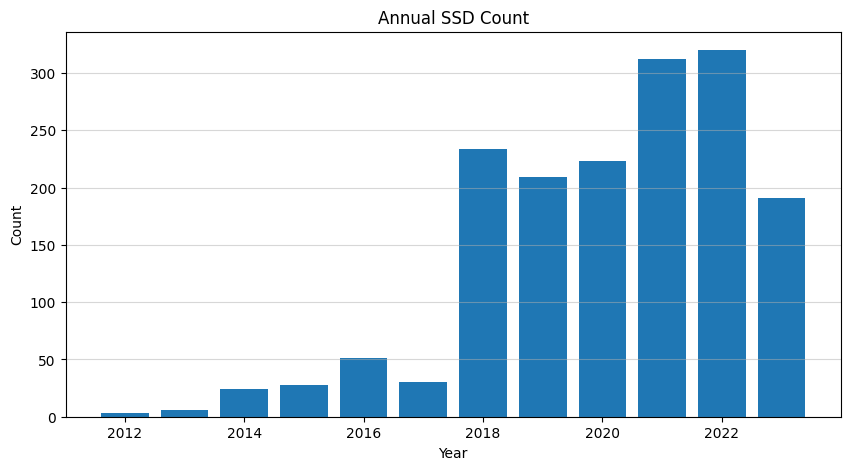

In [6]:
def plot_ssd_count_by_year(df):
  year_column = 'Solid-State-Drive - Released Year'
  df_sub = df.copy()
  df_sub = df_sub[df_sub[year_column] >= 2012]
  df_sub = df_sub[df_sub[year_column] <= 2023]
  year_counts = df_sub[year_column].value_counts()
  year_counts.sort_index(inplace=True)

  fig, ax = plt.subplots()
  fig.set_size_inches(10, 5)

  axis = fig.axes[0]

  axis.bar(year_counts.index, year_counts.values)

  axis.set_title(label='Annual SSD Count')
  axis.set_xlabel(xlabel='Year')
  axis.set_ylabel(ylabel='Count')
  axis.grid(True, axis='y', alpha=0.5)
  plt.show();


plot_ssd_count_by_year(
  df=get_processed_dataframe(json_input_file_path='data/ssd.json', verbose=False)
)

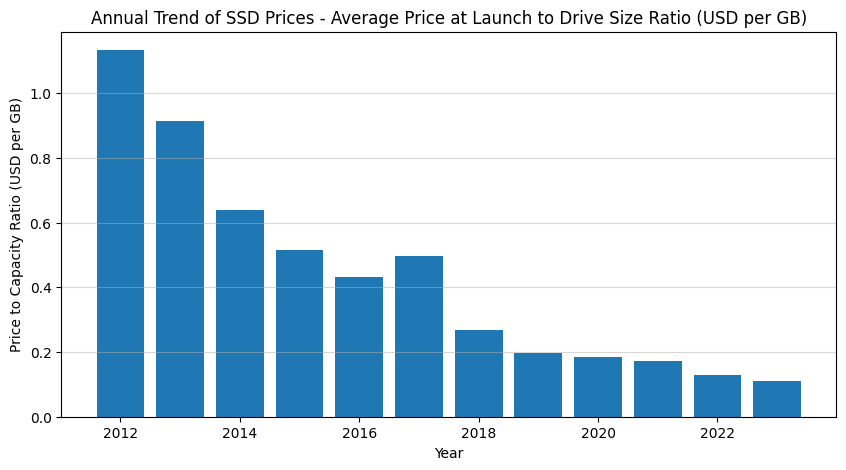

In [7]:
def plot_price_per_GB_vs_year(df):
  year_column = 'Solid-State-Drive - Released Year'
  price_column = 'Solid-State-Drive - Price at Launch (USD)'
  ssd_size_column = 'Solid-State-Drive - Capacity (GB)'
  price_per_GB_column = 'Price to Capacity Ratio at Launch (USD per GB)'

  df_sub = df[
    [
      year_column,
      price_column,
      ssd_size_column
    ]
  ].copy()
  df_sub = df_sub[df_sub[year_column] >= 2012]
  df_sub = df_sub[df_sub[year_column] <= 2023]
  df_sub.dropna(inplace=True) # Cannot plot NaN values

  df_sub[price_per_GB_column] = df_sub[price_column] / df_sub[ssd_size_column]

  series_yearly_price_per_GB = df_sub.groupby(year_column)[price_per_GB_column].mean()

  fig, ax = plt.subplots()
  fig.set_size_inches(10, 5)

  axis = fig.axes[0]

  axis.bar(
    series_yearly_price_per_GB.index,
    series_yearly_price_per_GB.values
  )

  axis.set_title(label='Annual Trend of SSD Prices - Average Price at Launch to Drive Size Ratio (USD per GB)')
  axis.set_xlabel(xlabel='Year')
  axis.set_ylabel(ylabel='Price to Capacity Ratio (USD per GB)')
  axis.grid(True, axis='y', alpha=0.5)
  plt.show();

plot_price_per_GB_vs_year(df=get_processed_dataframe())
# Note: The dataframe is created new as I want to avoid accidentally changing the dataframe.
#       It is not a big problem here as the dataset is small.

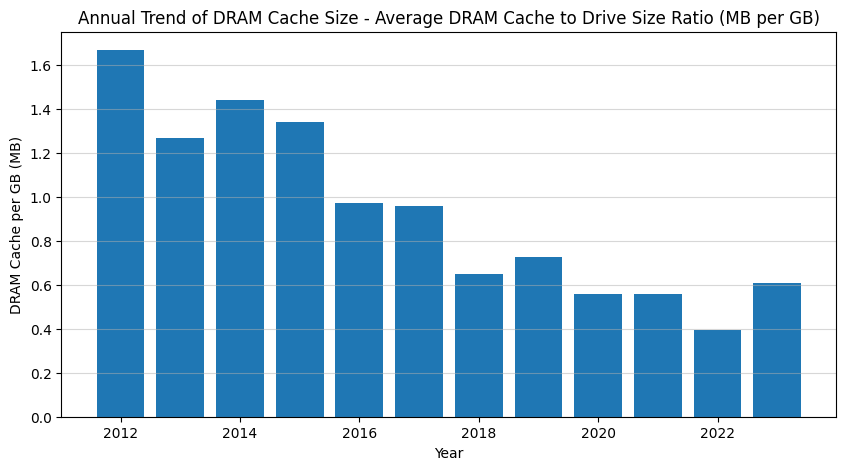

In [8]:
def plot_DRAM_Cache_per_GB_vs_year(df):
  year_column = 'Solid-State-Drive - Released Year'
  dram_cache_column = 'DRAM Cache - Capacity (MB)'
  ssd_size_column = 'Solid-State-Drive - Capacity (GB)'
  dram_cache_per_GB_column = 'DRAM Cache to Capacity Ratio (MB per GB)'

  df_sub = df[
    [
      year_column,
      dram_cache_column,
      ssd_size_column,
    ]
  ].copy()
  df_sub = df_sub[df_sub[year_column] >= 2012]
  df_sub = df_sub[df_sub[year_column] <= 2023]
  # Replace null values of DRAM Cache with 0 for simplicity. Note that in reality, sometimes the capacity might simply be unknown, not necessarily 0.
  df_sub[dram_cache_column].fillna(0, inplace=True)
  df_sub.dropna(inplace=True) # Cannot plot NaN values

  df_sub[dram_cache_per_GB_column] = df_sub[dram_cache_column] / df_sub[ssd_size_column]

  yearly_dram_cache_per_GB = df_sub.groupby(year_column)[dram_cache_per_GB_column].mean()

  fig, ax = plt.subplots()
  fig.set_size_inches(10, 5)

  axis = fig.axes[0]

  axis.bar(
    yearly_dram_cache_per_GB.index,
    yearly_dram_cache_per_GB.values
  )

  axis.set_title(label='Annual Trend of DRAM Cache Size - Average DRAM Cache to Drive Size Ratio (MB per GB)')
  axis.set_xlabel(xlabel='Year')
  axis.set_ylabel(ylabel='DRAM Cache per GB (MB)')
  axis.grid(True, axis='y', alpha=0.5)
  plt.show();

plot_DRAM_Cache_per_GB_vs_year(df=get_processed_dataframe())
# Note: The dataframe is created new as I want to avoid accidentally changing the dataframe.
#       It is not a big problem here as the dataset is small.